### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from mrmr import mrmr_regression
from math import sqrt
import joblib
import time
from scipy.stats import pearsonr
from scipy.stats import linregress




### Data Analysis and Features selection

In [2]:
Train_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-1')
Train_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-2')
Train_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-3')
Train_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-4')
Train_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-5')
Train_6 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-6')
Train_7 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-7')
Train_8 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-8')
Train_9 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-9')
Train_10 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-10')

#concatenate the data

Train = pd.concat([Train_1, Train_2, Train_3, Train_4, Train_5, Train_6, Train_7, Train_8, Train_9, Train_10], ignore_index=True)

In [3]:
#Import data

Test_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-1')
Test_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-2')
Test_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-3')
Test_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-4')
Test_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-5')

Test = pd.concat([Test_1, Test_2, Test_3, Test_4, Test_5], ignore_index=True)

In [33]:
features=['x2', 'x5', 'x8','x6']

X=Train[features]
y=Train['BIS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


### Model Building for Random Forest regressor

In [34]:
# Create a RandomForestRegressor model
rf_regressor = RandomForestRegressor()

# Define the parameter grid for GridSearchCV

param_grid = {
    "n_estimators":[200],
    "max_depth":[5],
    "min_samples_split":[5],
    "random_state":[42],
    "max_features":["sqrt"],
    "criterion":["squared_error"]
}



# Create a GridSearchCV object
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='r2', return_train_score=True)

start = time.time()
grid_search.fit(X_train, y_train)

filename = 'RF model.sav'
joblib.dump(grid_search, filename)


duration  = (time.time() - start)
print(f"Took{duration} seconds")


train_score=grid_search.score (X_train, y_train)

y_pred = grid_search.predict(X_test)

test_score=grid_search.score(X_test, y_test)
best_rf_model = grid_search.best_estimator_


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
correlation_coefficient, _ = pearsonr(y_test, y_pred)

print("Best Random Forest Regressor Model:", best_rf_model)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
#print('The model_score is', model_score)
print("train score is: ", train_score)
print('test score is: ', test_score)

Took52.03741979598999 seconds
Best Random Forest Regressor Model: RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, random_state=42)
Mean Squared Error (MSE): 36.600959525516906
R-squared (R2): 0.8737630415053099
train score is:  0.874786736753341
test score is:  0.8737630415053099


In [7]:
train_score=grid_search.score (X_train, y_train)
train_score


Took2515.3944911956787 seconds
Best Random Forest Regressor Model: RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=5,
                      n_estimators=20, random_state=11)
Mean Squared Error (MSE): 37.51117428824452
R-squared (R2): 0.8706237045941125
    
    
Took57.238036155700684 seconds
Best Random Forest Regressor Model: RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, random_state=42)
Mean Squared Error (MSE): 43.045385491927235
R-squared (R2): 0.8515361724890296
train score is:  0.8514641343930374
test score is:  0.8515361724890296
    
    
Took29.84398341178894 seconds
Best Random Forest Regressor Model: RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=5,
                      random_state=11)
Mean Squared Error (MSE): 43.30058641792574
R-squared (R2): 0.8506559827584674
train score is:  0.8504491993172447
test score is:  0.8506559827584674
    
    
Took5.998032808303833 seconds
Best Random Forest Regressor Model: RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=5,
                      n_estimators=20, random_state=11)
Mean Squared Error (MSE): 44.314030858795505
R-squared (R2): 0.8471606059848187
train score is:  0.8469539948018019
test score is:  0.8471606059848187

0.8700494915004333

In [45]:
"""rf=RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_split=5,
                      n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

filename = 'rf model.sav'
joblib.dump(rf, filename)

train_score=rf.score (X_train, y_train)

y_pred = rf.predict(X_test)

test_score=rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('Train score:', train_score, 'Test score:', test_score)
print('mse: ', mse)"""

Train score: 0.7718679158305406 Test score: 0.7752771303892876
mse:  65.1558208717907


### Evaluation metrics

In [35]:
model= grid_search
# Assuming you have 10 test datasets stored in a list called "test_datasets"
test_datasets = [Test_1, Test_2, Test_3, Test_4, Test_5, Test]  # Fill this with your test datasets

def evaluate_model_on_test_data(model, test_data,features):
    # Extract features (X) and labels (y) from the test data
    X_test = test_data[features]  # Adjust 'target_column_name' to your actual target column
    y_test = test_data['BIS']  # Adjust 'target_column_name' to your actual target column

    # Make predictions using the model
    y_pred = model.predict(X_test)


    # Calculate evaluation metrics
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    correlation_coefficient, _ = pearsonr(y_test, y_pred)

    return r_squared, mse, correlation_coefficient

train_score= model.score(X_train, y_train)
print('Train_score: ', train_score )

print("---------------------------")

# Loop through each test dataset and evaluate the model
results = []
for test_data in test_datasets:
    r_squared, mse, correlation_coefficient = evaluate_model_on_test_data(model, test_data, features)
    results.append({'R-Squared': r_squared, 'MSE': mse, 'r': correlation_coefficient})

# Display results for each test dataset
for idx, result in enumerate(results):
    print(f"Results for Test Dataset {idx + 1}:")
    print("R-Squared:", result['R-Squared'])
    print("MSE:", result['MSE'])
    print('r:', result['r'])
    print("---------------------------")


Train_score:  0.874786736753341
---------------------------
Results for Test Dataset 1:
R-Squared: 0.800781466834261
MSE: 62.44608560239794
r: 0.9187929545677924
---------------------------
Results for Test Dataset 2:
R-Squared: 0.7095114047842257
MSE: 61.011029587243705
r: 0.8824156586809054
---------------------------
Results for Test Dataset 3:
R-Squared: 0.6432631459040802
MSE: 109.7584306927758
r: 0.8200524191585898
---------------------------
Results for Test Dataset 4:
R-Squared: 0.6073629466378224
MSE: 95.8486134016817
r: 0.7827628495938823
---------------------------
Results for Test Dataset 5:
R-Squared: 0.829295894753281
MSE: 58.92030654509946
r: 0.9490624219108095
---------------------------
Results for Test Dataset 6:
R-Squared: 0.7244861090110353
MSE: 79.52109046180745
r: 0.8530722349322004
---------------------------


### Scatter Plot

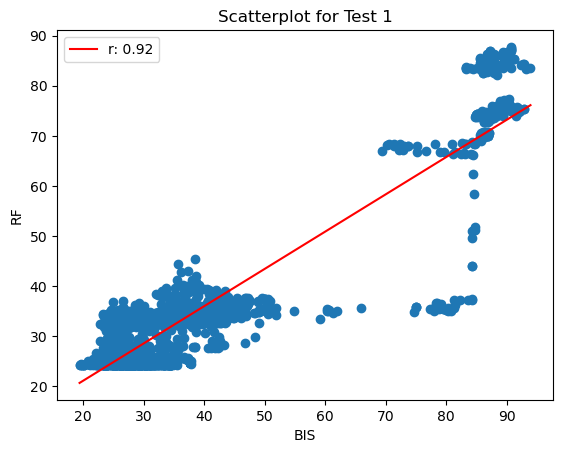

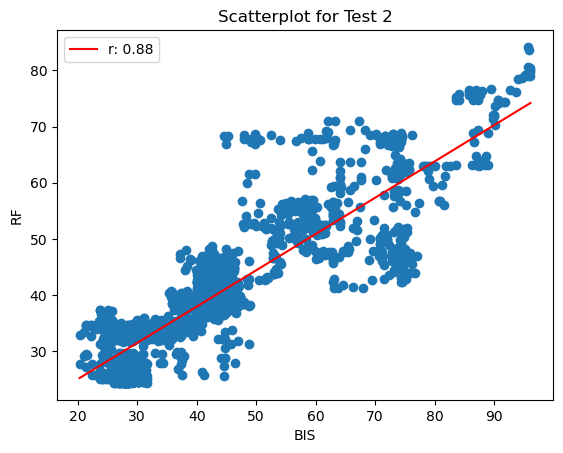

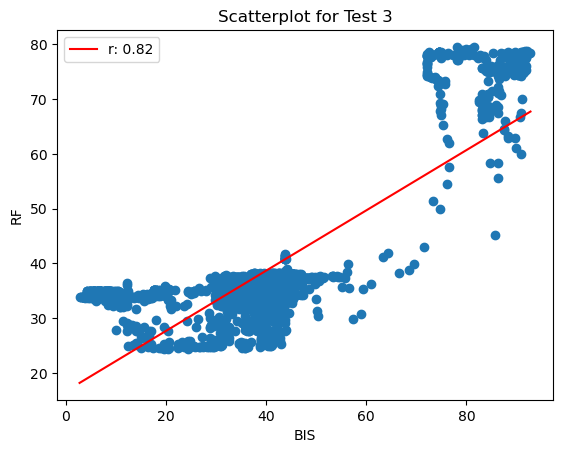

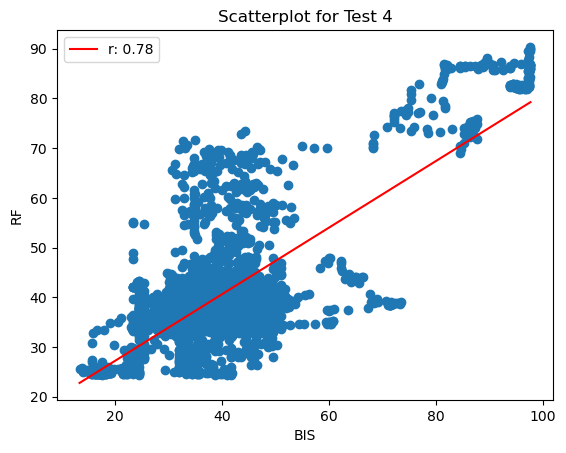

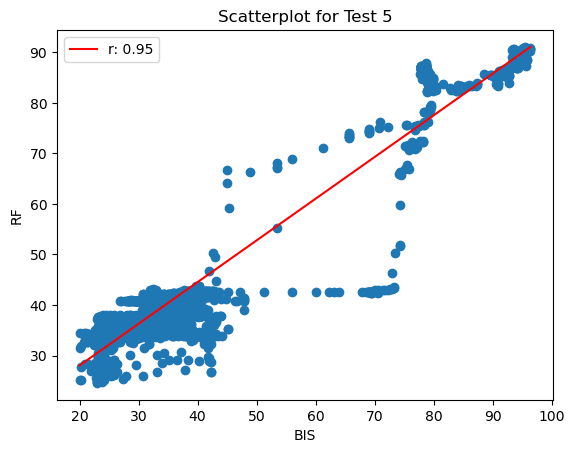

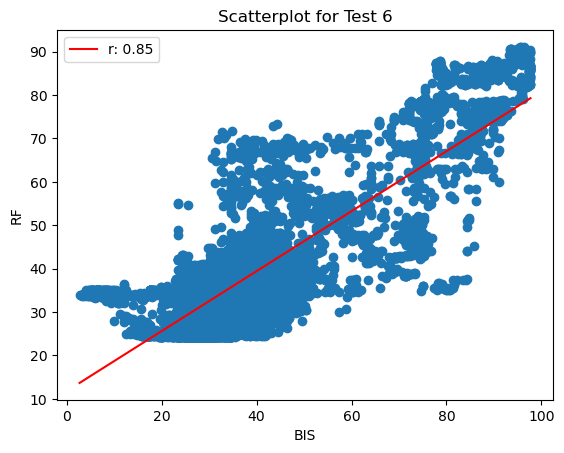

In [39]:

model=grid_search

for idx, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    y_pred = model.predict(X_test)
    slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
    x_range = np.array([y_test.min(), y_test.max()])
    plt.plot(x_range, slope * x_range + intercept, color='red', label=f'r: {round(r_value, 2)}')
    plt.scatter(y_test, y_pred)
    plt.xlabel('BIS')
    plt.ylabel('RF')
    plt.title(f'Scatterplot for Test {idx+1}' )
    plt.legend()
    plt.show()
    

### Bland-Altman plots

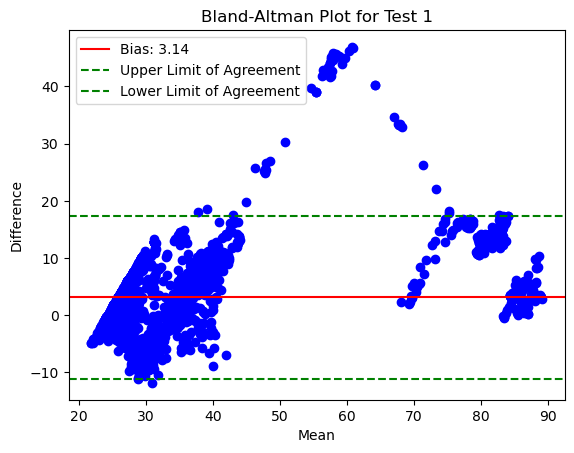

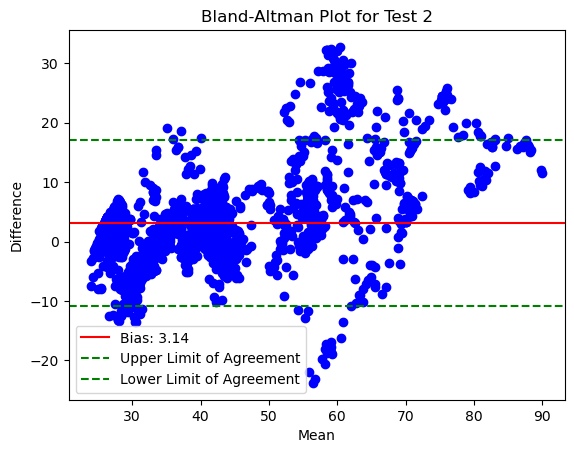

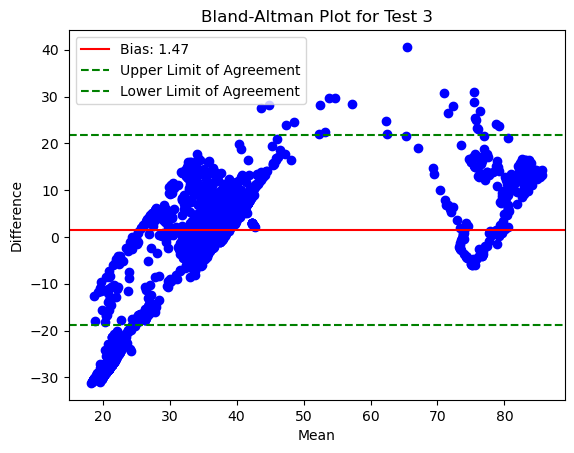

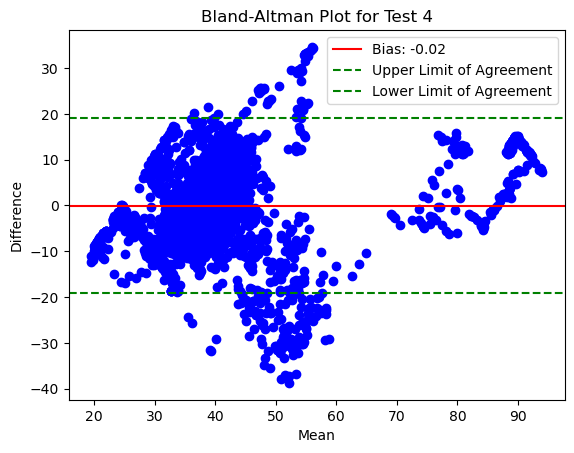

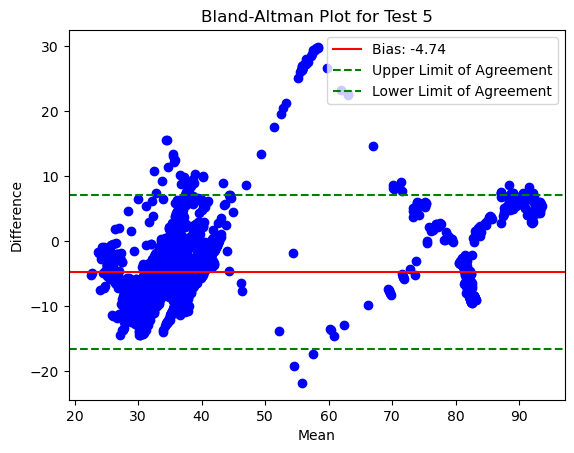

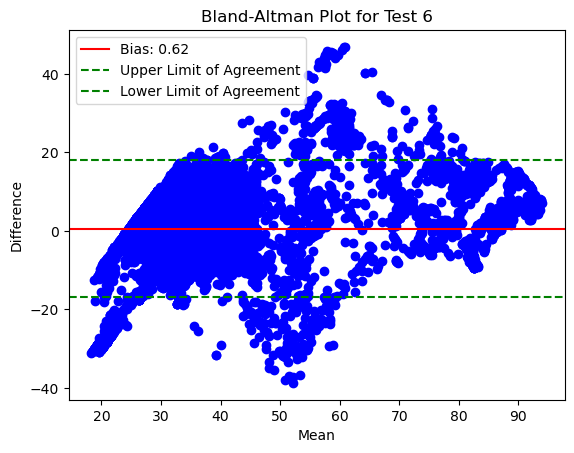

In [37]:
model=grid_search

for idx, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
  # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate residuals
    residuals = y_test - y_pred

    # Bland-Altman Plot
    mean_difference = np.mean(residuals)
    limits_of_agreement = 1.96 * np.std(residuals)

    plt.scatter((y_pred + y_test) / 2, residuals, color='blue')
    plt.axhline(mean_difference, color='red', linestyle='-', label=f'Bias: {mean_difference:.2f}')
    plt.axhline(mean_difference + limits_of_agreement, color='green', linestyle='--', label='Upper Limit of Agreement')
    plt.axhline(mean_difference - limits_of_agreement, color='green', linestyle='--', label='Lower Limit of Agreement')
    plt.xlabel('Mean')
    plt.ylabel('Difference')
    plt.title(f'Bland-Altman Plot for Test {idx+1}')
    plt.legend()
    plt.show()

    

    

    
    
    




### Visualize New index with BIS

Normalized New Index:
[16.64910843 16.9757982  15.76952147 15.68381094 15.64697486]


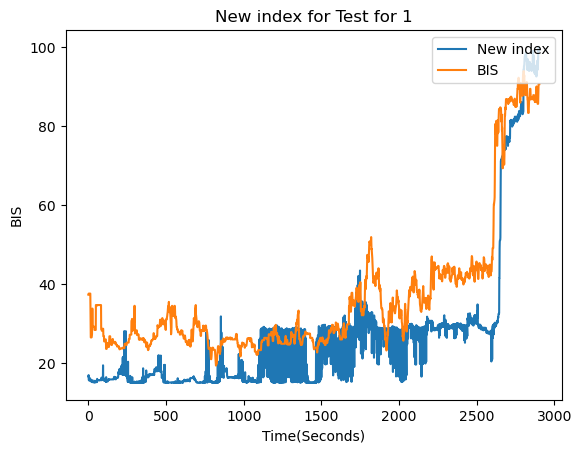

Normalized New Index:
[100.          99.2936085   94.77389204  93.64206351  92.60763023]


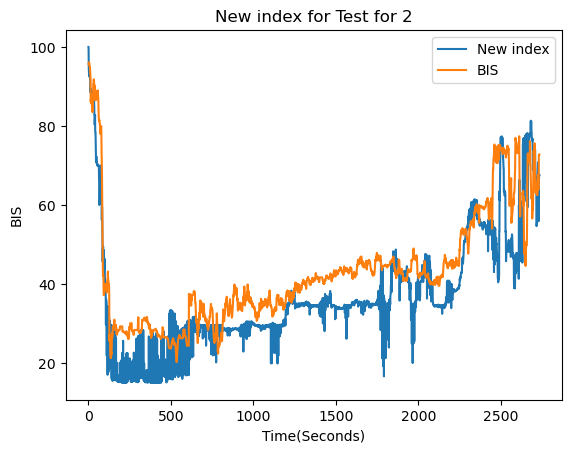

Normalized New Index:
[99.84114263 99.42935712 99.46640051 96.79539246 97.6426505 ]


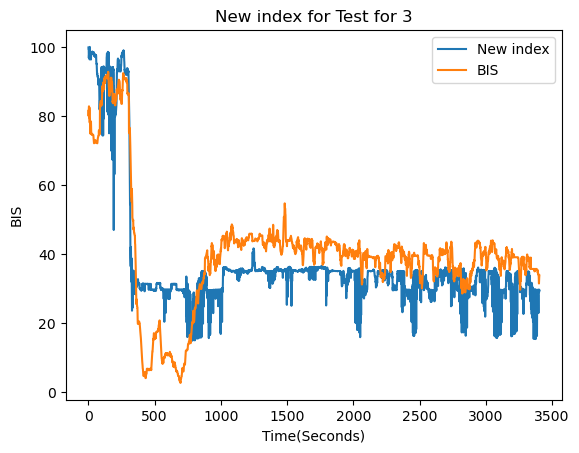

Normalized New Index:
[89.35330717 89.67397396 90.44197814 90.05586774 90.35975178]


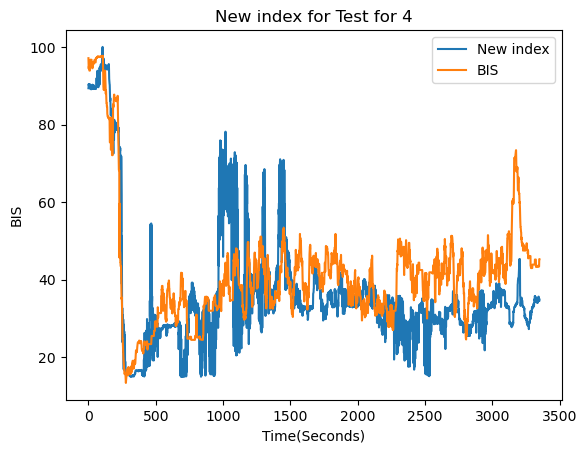

Normalized New Index:
[92.71387249 94.21148956 94.47542547 94.450595   92.66882008]


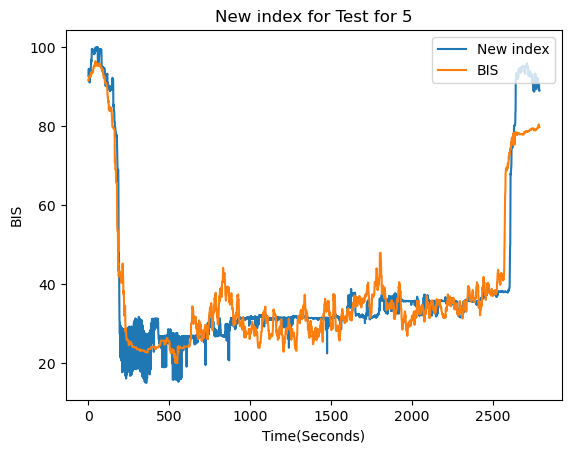

Normalized New Index:
[16.56687543 16.87727478 15.73114918 15.64971262 15.61471338]


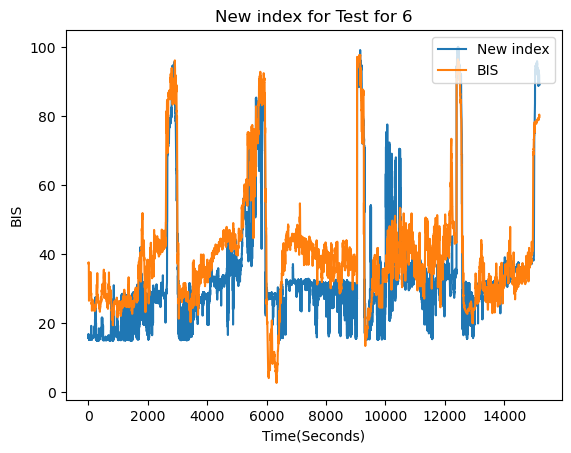

In [38]:
modelf=grid_search

for idx, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    y_pred = model.predict(X_test)

    # Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(15, 100))
    new_index_normalized = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

    # Display the normalized new index for the first few data points
    print("Normalized New Index:")
    print(new_index_normalized[:5])

    plt.plot(new_index_normalized, label='New index')
    plt.plot(y_test,label ="BIS")
    plt.title(f"New index for Test for {idx+1}")
    plt.ylabel('BIS')
    plt.xlabel('Time(Seconds)')
    plt.legend(loc="upper right")
    plt.show()


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming you have your data loaded into a DataFrame named 'data'
# X contains the feature columns, and y contains the target variable column
X=Train[feat]
y= Train['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


  feature  importance
1      x2    0.606313
4      x5    0.170449
5      x6    0.089378
7      x8    0.064172
6      x7    0.029623
0      x1    0.024073
3      x4    0.014414
2      x3    0.001579
